In [1]:
# Import Dependencies
import pandas as pd
import sklearn.preprocessing as skl
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sn
import xgboost as xgb

In [2]:
# Read in the csv 
sales_df = pd.read_csv("Walmart.csv")
sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Extract the date from the dataframe
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Day'] = sales_df['Date'].dt.weekday
sales_df['Week'] = sales_df['Date'].dt.week
sales_df['Month'] = sales_df['Date'].dt.month

C:\Users\Reid0\AppData\Local\Temp\ipykernel_39056\1628188651.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_df['Date'] = pd.to_datetime(sales_df['Date'])
C:\Users\Reid0\AppData\Local\Temp\ipykernel_39056\1628188651.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales_df['Week'] = sales_df['Date'].dt.week


In [4]:
sales_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,3,19,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,50,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10


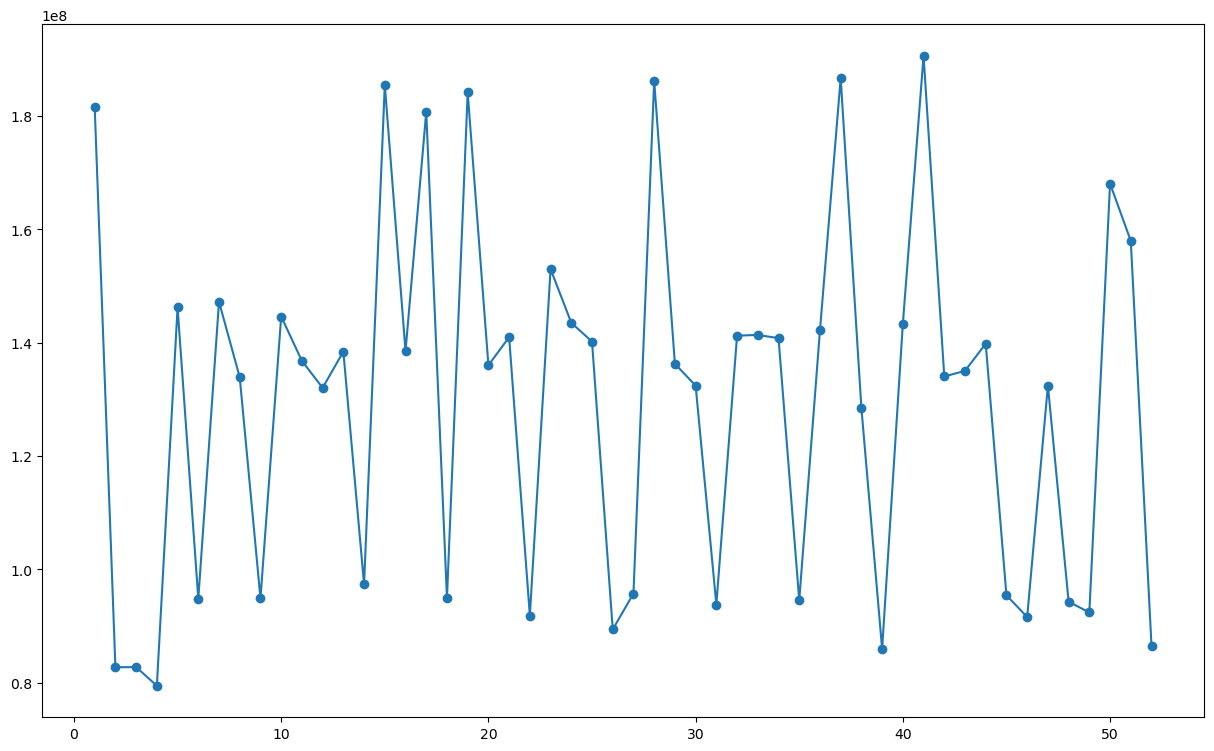

In [5]:
# Plot the weekly sales
weekly_sale = sales_df.groupby('Week')['Weekly_Sales'].sum()
plt.figure(figsize=(15, 9))
plt.plot(weekly_sale, marker='o', linestyle='-')

C:\Users\Reid0\AppData\Local\Temp\ipykernel_39056\1983202513.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_df.corr()


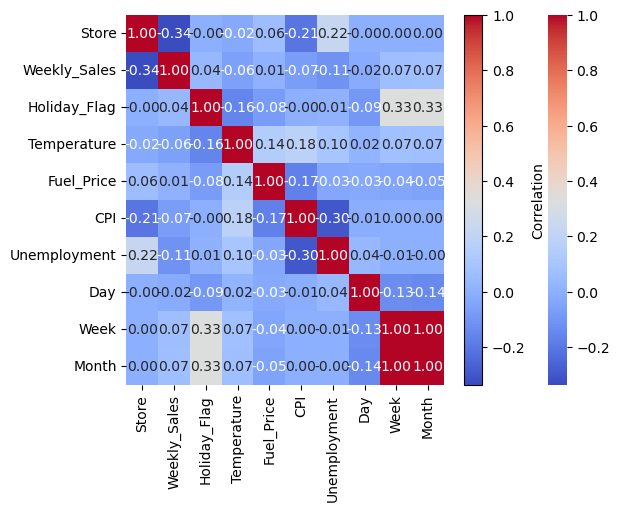

In [6]:
# Creating correlation matrix
# Calculate the correlation matrix
correlation_matrix = sales_df.corr()
# Create a heatmap with annotations and capture the Axes object
ax = sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# Optionally, you can set the color bar label
plt.colorbar(ax.collections[0], label='Correlation')
# Show the plot
plt.show()

# Preprocessing

In [7]:
# dropping the date column
sales_df.drop('Date',axis=1,inplace=True)

In [8]:
# Use Preprocessing methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
columns_to_drop = ['Day', 'Month', 'Store']
sales_df.drop(columns_to_drop, axis=1)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1643690.90,0,42.31,2.572,211.096358,8.106,17
1,1641957.44,1,38.51,2.548,211.242170,8.106,48
2,1611968.17,0,39.93,2.514,211.289143,8.106,7
3,1409727.59,0,46.63,2.561,211.319643,8.106,8
4,1554806.68,0,46.50,2.625,211.350143,8.106,18
...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,39
6431,733455.07,0,64.89,3.985,192.170412,8.667,19
6432,734464.36,0,54.47,4.000,192.327265,8.667,50
6433,718125.53,0,56.47,3.969,192.330854,8.667,42


In [10]:
# Get our target and features arrays
y = sales_df['Weekly_Sales'].values
X = sales_df.drop('Weekly_Sales', axis=1).values
X_scaled = scaler.fit_transform(X)

In [11]:
# Split into testing and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [12]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# Run XGBOOST again after optimization

In [13]:
# Rerun XGBoost Model
params = {
    'objective': 'reg:squarederror',  # for regression
    'eval_metric': 'rmse',            # rmse for regression
    'eta': 0.1,                       # learning rate
    'max_depth': 3,                   # maximum depth of the tree
    'min_child_weight': 1,            # minimum sum of instance weight (hessian) needed in a child
    'gamma': 0,                       # minimum loss reduction required to make a further partition on a leaf node
    'subsample': 0.8,                 # subsample ratio of the training instance
    'colsample_bytree': 0.8,          # subsample ratio of columns when constructing each tree
    'seed': 42                        # random seed for reproducibility
}

# Train the regression model
num_rounds = 100  # Number of boosting rounds (iterations)
model = xgb.train(params, dtrain, num_rounds)

In [16]:
y_pred = model.predict(dtest)


In [17]:
# Create DataFrame X_test
X_test_df = pd.DataFrame(X_test, columns=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Week', 'Month'])

In [18]:
# Add columns Weekly_Sales and Sales_predicted to DataFrame
X_test_df['Weekly_Sales'] = y_test
X_test_df['Sales_predicted'] = y_pred

In [19]:
 # Aggregate based on the week
X_test_df[['Weekly_Sales', 'Sales_predicted']].groupby(X_test_df['Week']).mean()

,Weekly_Sales,Sales_predicted
Week,,
-1.722871,1.025890e+06,1.007701e+06
-1.653956,1.010125e+06,1.075316e+06
-1.585041,9.273719e+05,9.873354e+05
-1.516126,8.132067e+05,9.265797e+05
-1.447211,1.120109e+06,1.039538e+06
-1.378296,9.633257e+05,9.669805e+05
-1.309382,1.114304e+06,1.044822e+06
-1.240467,1.029758e+06,1.046813e+06
-1.171552,9.921285e+05,9.801271e+05


In [22]:
# Calculate r2 score on test data
from sklearn.metrics import r2_score
r2 = r2_score(X_test_df['Weekly_Sales'], X_test_df['Sales_predicted'])
print("R2 Score:", r2)

R2 Score: 0.9037557050115052


In [23]:
# Calculate r2 score on training data to compare
y_pred_train = model.predict(dtrain)

# Calculate R-squared
r_squared = r2_score(y_train, y_pred_train)

print("R-squared:", r_squared)


R-squared: 0.9074122083108639
